In [1]:
import pandas as pd
import numpy as np

In [ ]:
X = pd.read_excel('/content/prep X.xlsx')
X

,N_total,Mismatch,Avg at. wt.,avg s val e-,Pn s+p energy,chg s+p energy,Avg Pn-chg EN,Diff Pn-chg EN,Ionicity,Hybridisation,Ratio +3 Ph/-2 chg,avg ionic char,avg_polarizability(A^3),range_Covalent_Radius
0,12,-0.285714,132.286667,2.000000,-0.631228,-0.747591,2.081818,6.50,-0.104000,2.109705,81.421053,0.001299,5.975000,0.002600
1,4,0.000000,121.792535,1.750000,-0.606327,-0.747591,2.073333,2.18,-0.560000,1.282051,3.777778,0.052487,10.500000,0.006067
2,9,-0.200000,106.442304,2.000000,-0.606327,-0.867054,2.398571,8.71,-0.220000,2.127660,16.923077,0.017053,5.111111,0.016800
3,12,-0.285714,161.360123,2.000000,-0.606327,-0.747591,2.070909,6.62,-0.144000,1.945525,52.888889,0.001609,6.241667,0.002956
4,7,0.333333,58.370857,1.571429,-0.631228,-0.892588,2.447500,5.69,-0.790000,0.928074,7.263158,0.024547,5.057143,0.028800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,4,0.000000,97.568825,2.000000,-0.631228,-0.892588,2.403333,3.11,-0.405000,2.040816,4.842105,0.037023,5.000000,0.039022
215,9,-0.200000,86.895909,2.000000,-0.721167,-0.867054,2.444286,8.39,-0.190000,2.325581,34.137931,0.015037,4.777778,0.012422
216,5,-0.333333,113.524074,2.000000,-0.631228,-0.867054,2.425000,5.60,-0.235000,2.247191,7.815789,0.015417,5.080000,0.016089
217,7,-0.250000,123.920454,2.000000,-0.721167,-0.747591,2.126667,4.04,-0.026667,2.158273,30.482759,0.001562,5.342857,0.013156


In [ ]:
y = pd.read_excel('/content/prep y.xlsx')
y

,kappa
0,0.73
1,0.63
2,0.33
3,0.72
4,0.30
...,...
214,1.20
215,0.34
216,0.60
217,0.83


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
def save_to_excel(data, filename):
    
    filepath = f"{filename}.xlsx"
    data.to_excel(filepath, index=False)
    print(f"File saved: {filepath}")

save_to_excel(x_train, 'x_train')
save_to_excel(x_test, 'x_test')
save_to_excel(y_train, 'y_train')
save_to_excel(y_test, 'y_test')

File saved: x_train.xlsx
File saved: x_test.xlsx
File saved: y_train.xlsx
File saved: y_test.xlsx


##KRR

Min Test RMSE for KRR: 0.2879898914967621
Min Test MAE for KRR: 0.22326237141830163
Max Test R2 for KRR: 0.1745425577885028
Min Train RMSE for KRR: 0.32688625275343763
Min Train MAE for KRR: 0.26040561078343216
Max Train R2 for KRR: 0.13398255584596863


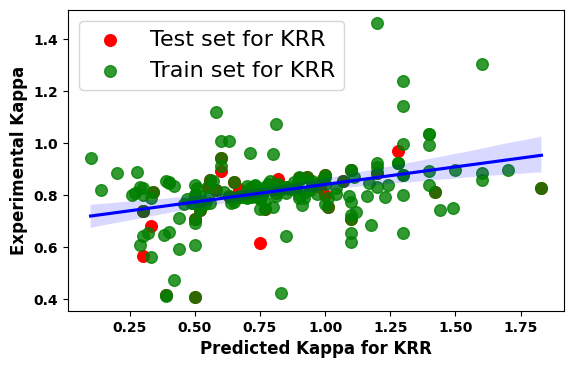

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.kernel_ridge import KernelRidge
krr = KernelRidge()
krr.fit(x_train, y_train)
krr_pred_test = krr.predict(x_test)
krr_pred_train = krr.predict(x_train)
   
krr_rmse_test = sqrt(mean_squared_error(y_test, krr_pred_test))
krr_mae_test = mean_absolute_error(y_test, krr_pred_test)
krr_r2_test = r2_score(y_test, krr_pred_test)

krr_rmse_train = sqrt(mean_squared_error(y_train, krr_pred_train))
krr_mae_train = mean_absolute_error(y_train, krr_pred_train)
krr_r2_train = r2_score(y_train, krr_pred_train)

print("Min Test RMSE for KRR:", krr_rmse_test)
print("Min Test MAE for KRR:", krr_mae_test)
print("Max Test R2 for KRR:", krr_r2_test)
print("Min Train RMSE for KRR:", krr_rmse_train)
print("Min Train MAE for KRR:", krr_mae_train)
print("Max Train R2 for KRR:", krr_r2_train)

plt.scatter(y_test, krr_pred_test, color='r', s=70, label='Test set for KRR')
sns.regplot(x=y_train, y=krr.predict(x_train), color='g', scatter_kws={'s': 70},
            line_kws={'color': 'blue'}, label='Train set for KRR')

plt.xlabel('Predicted Kappa for KRR', fontsize=12, weight='bold')
plt.ylabel('Experimental Kappa', fontsize=12, weight='bold')
plt.gca().set_aspect('equal', adjustable='box')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.legend(fontsize=16)
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
krr.get_params()

{'alpha': 1,
 'coef0': 1,
 'degree': 3,
 'gamma': None,
 'kernel': 'linear',
 'kernel_params': None}

In [ ]:
alpha_1 = [-5, -1, 0, 1, 5, 10, 20, 30, 50]
coef0_1  = [-3, -2, -1, 0, 1, 2, 3,4,5]
degree_1 = [0,1,2,3,4,5,6,7,8,9,10]
gamma_1 = [0.1,0.2, 0.4, 0.5,1.0]
kernel_1 = ['linear', 'rbf', 'laplacian', 'polynomial']

In [ ]:
random_grid_krr = {'alpha':alpha_1,
                   'degree': degree_1,
                   'coef0': coef0_1,
                   'gamma': gamma_1,
                   'kernel': kernel_1}

In [ ]:
rf_randomcv_krr = RandomizedSearchCV(estimator=krr, param_distributions=random_grid_krr, random_state=60)
rf_randomcv_krr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:255:

RandomizedSearchCV(estimator=KernelRidge(),
                   param_distributions={'alpha': [-5, -1, 0, 1, 5, 10, 20, 30,
                                                  50],
                                        'coef0': [-3, -2, -1, 0, 1, 2, 3, 4, 5],
                                        'degree': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10],
                                        'gamma': [0.1, 0.2, 0.4, 0.5, 1.0],
                                        'kernel': ['linear', 'rbf', 'laplacian',
                                                   'polynomial']},
                   random_state=60)

In [ ]:
rf_randomcv_krr.best_params_

{'kernel': 'linear', 'gamma': 0.4, 'degree': 10, 'coef0': -3, 'alpha': 0}

In [ ]:
best_randomgrid = rf_randomcv_krr.best_estimator_

In [ ]:
y_train_pred = best_randomgrid.predict(x_train)
y_test_pred = best_randomgrid.predict(x_test)
train_mae = mean_absolute_error(y_train,y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Training MAE: {train_mae:.2f}, Training RMSE: {train_rmse:.2f}, Training R2 score: {train_r2:.2f}")
print(f"Testing MAE: {test_mae:.2f}, Testing RMSE: {test_rmse:.2f}, Testing R2 score: {test_r2:.2f}")

Training MAE: 0.26, Training RMSE: 0.32, Training R2 score: 0.16
Testing MAE: 0.22, Testing RMSE: 0.28, Testing R2 score: 0.22


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
import numpy as np
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
regressor = KernelRidge()
alpha_1 = [-5, -1, 0, 1, 5, 10, 20, 30, 50]
coef0_1  = [-3, -2, -1, 0, 1, 2, 3,4,5]
degree_1 = [0,1,2,3,4,5,6,7,8,9,10]
gamma_1 = [0.1,0.2, 0.4, 0.5,1.0]
kernel_1 = ['linear', 'rbf', 'laplacian', 'polynomial']

random_grid_krr = {'alpha':alpha_1,
                   'degree': degree_1,
                   'coef0': coef0_1,
                   'gamma': gamma_1,
                   'kernel': kernel_1}

randomcv_krr = RandomizedSearchCV(estimator=regressor,
                                  param_distributions=random_grid_krr,
                                  n_iter=100,
                                  scoring='neg_mean_absolute_error',
                                  n_jobs=4,
                                  cv=5,
                                  verbose=5,
                                  return_train_score=True,
                                  random_state=13)

randomcv_krr.fit(x_train, y_train)
best_randomcv_krr = randomcv_krr.best_estimator_
reg_krr = best_randomcv_krr.fit(x_train, y_train)
pred_krr_randombest = best_randomcv_krr.predict(x_test)
pred_krr_train = best_randomcv_krr.predict(x_train)
krr_randombestTEST_rmse = sqrt(mean_squared_error(y_test, pred_krr_randombest))
krr_randombestTEST_mae = mean_absolute_error(y_test, pred_krr_randombest)
krr_r2_test = r2_score(y_test, pred_krr_randombest)
krr_randombestTRAIN_rmse = sqrt(mean_squared_error(y_train, pred_krr_train))
krr_randombestTRAIN_mae = mean_absolute_error(y_train, pred_krr_train)
krr_r2_train = r2_score(y_train, pred_krr_train)
print("Train RMSE:", krr_randombestTRAIN_rmse)
print("Train MAE:", krr_randombestTRAIN_mae)
print("Train R2:", krr_r2_train)
print("Test RMSE:", krr_randombestTEST_rmse)
print("Test MAE:", krr_randombestTEST_mae)
print("Test R2:", krr_r2_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Train RMSE: 0.32922032324297723
Train MAE: 0.26342594413707865
Train R2: 0.1215711297645028
Test RMSE: 0.29290716206197775
Test MAE: 0.22880410926390768
Test R2: 0.14611343377443975


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
120 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
65 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

In [ ]:
print("Train RMSE:", krr_randombestTRAIN_rmse)
print("Train MAE:", krr_randombestTRAIN_mae)
print("Train R2:", krr_r2_train)
print("Test RMSE:", krr_randombestTEST_rmse)
print("Test MAE:", krr_randombestTEST_mae)
print("Test R2:", krr_r2_test)

Train RMSE: 0.32922032324297723
Train MAE: 0.26342594413707865
Train R2: 0.1215711297645028
Test RMSE: 0.29290716206197775
Test MAE: 0.22880410926390768
Test R2: 0.14611343377443975


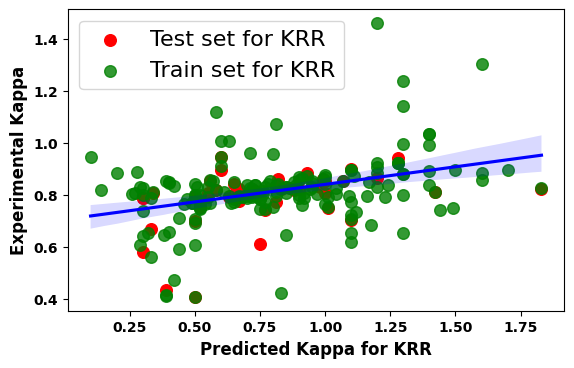

In [ ]:
plt.scatter(y_test, pred_krr_randombest, color='r', s=70, label='Test set for KRR')
sns.regplot(x=y_train, y=krr.predict(x_train), color='g', scatter_kws={'s': 70},
            line_kws={'color': 'blue'}, label='Train set for KRR')

plt.xlabel('Predicted Kappa for KRR', fontsize=12, weight='bold')
plt.ylabel('Experimental Kappa', fontsize=12, weight='bold')
plt.gca().set_aspect('equal', adjustable='box')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.legend(fontsize=16)
plt.show()

##DTR

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train, y_train)
dt_pred_test = dt_reg.predict(x_test)
dt_pred_train = dt_reg.predict(x_train)
dt_rmse_test = sqrt(mean_squared_error(y_test, dt_pred_test))
dt_mae_test = mean_absolute_error(y_test, dt_pred_test)
dt_r2_test = r2_score(y_test, dt_pred_test)
dt_rmse_train = sqrt(mean_squared_error(y_train, dt_pred_train))
dt_mae_train = mean_absolute_error(y_train, dt_pred_train)
dt_r2_train = r2_score(y_train, dt_pred_train)
print("Min Test RMSE for Decision Tree:",dt_rmse_test)
print("Min Test MAE for Decision Tree:",dt_mae_test)
print("Max Test R2 for Decision Tree:",dt_r2_test)
print("Min Train RMSE for Decision Tree:", dt_rmse_train)
print("Min Train MAE for Decision Tree:", dt_mae_train)
print("Max Train R2 for Decision Tree:", dt_r2_train)


Min Test RMSE for Decision Tree: 0.14886693264914017
Min Test MAE for Decision Tree: 0.06022727272727273
Max Test R2 for Decision Tree: 0.7794349590068703
Min Train RMSE for Decision Tree: 0.04302822993603817
Min Train MAE for Decision Tree: 0.01142857142857143
Max Train R2 for Decision Tree: 0.9849948518289333


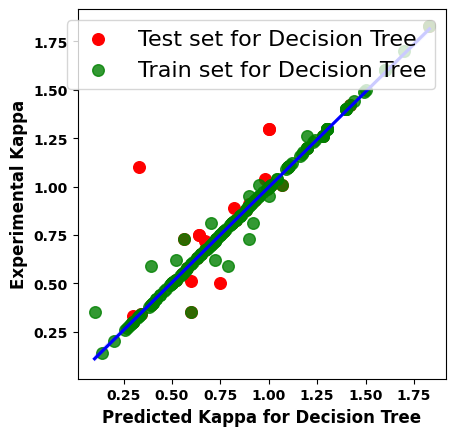

In [ ]:
plt.scatter(y_test, dt_pred_test, color='r', s=70, label='Test set for Decision Tree')
sns.regplot(x=y_train, y=dt_reg.predict(x_train), color='g', scatter_kws={'s': 70},
            line_kws={'color': 'blue'}, label='Train set for Decision Tree')

plt.xlabel('Predicted Kappa for Decision Tree', fontsize=12, weight='bold')
plt.ylabel('Experimental Kappa', fontsize=12, weight='bold')
plt.gca().set_aspect('equal', adjustable='box')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.legend(fontsize=16)
plt.show()

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
regressor = DecisionTreeRegressor()
max_depth = [2, 3, 5, 10, 15, 20, 25]
min_samples_split = [2, 5, 10, 15, 20]
min_samples_leaf = [1, 2, 5, 10, 15]
max_features = ['auto', 'sqrt', 'log2', None]
splitter = ['best', 'random']
criterion = ['mse', 'friedman_mse', 'mae', 'poisson']
dtr_randomgrid = {
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_features': max_features,
    'splitter': splitter,
    'criterion': criterion
}
randomcv_dtr = RandomizedSearchCV(estimator=regressor,
                                  param_distributions=dtr_randomgrid,
                                  n_iter=100,
                                  scoring='neg_mean_absolute_error',
                                  n_jobs=4,
                                  cv=3,
                                  verbose=5,
                                  return_train_score=True,
                                  random_state=13)

randomcv_dtr.fit(x_train, y_train)
best_randomcv_dtr = randomcv_dtr.best_estimator_
reg_dtr = best_randomcv_dtr.fit(x_train, y_train)
pred_dtr_randombest = best_randomcv_dtr.predict(x_test)
pred_dtr_train = best_randomcv_dtr.predict(x_train)
dtr_randombestTEST_rmse = sqrt(mean_squared_error(y_test, pred_dtr_randombest))
dtr_randombestTEST_mae = mean_absolute_error(y_test, pred_dtr_randombest)
dtr_r2_test = r2_score(y_test, pred_dtr_randombest)
dtr_randombestTRAIN_rmse = sqrt(mean_squared_error(y_train, pred_dtr_train))
dtr_randombestTRAIN_mae = mean_absolute_error(y_train, pred_dtr_train)
dtr_r2_train = r2_score(y_train, pred_dtr_train)
print("Train RMSE:", dtr_randombestTRAIN_rmse)
print("Train MAE:", dtr_randombestTRAIN_mae)
print("Train R2:", dtr_r2_train)
print("Test RMSE:", dtr_randombestTEST_rmse)
print("Test MAE:", dtr_randombestTEST_mae)
print("Test R2:", dtr_r2_test)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Train RMSE: 0.3017081012831344
Train MAE: 0.23899704073704073
Train R2: 0.26225330895746635
Test RMSE: 0.27587822325865713
Test MAE: 0.20958785091171456
Test R2: 0.24251325148245495


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
183 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
34 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

In [ ]:
pred_dtr_randombest = best_randomcv_dtr.predict(x_test)
pred_dtr_train = best_randomcv_dtr.predict(x_train)
dtr_randombestTEST_rmse = sqrt(mean_squared_error(y_test, pred_dtr_randombest))
dtr_randombestTEST_mae = mean_absolute_error(y_test, pred_dtr_randombest)
dtr_r2_test = r2_score(y_test, pred_dtr_randombest)
dtr_randombestTRAIN_rmse = sqrt(mean_squared_error(y_train, pred_dtr_train))
dtr_randombestTRAIN_mae = mean_absolute_error(y_train, pred_dtr_train)
dtr_r2_train = r2_score(y_train, pred_dtr_train)
print("Train RMSE:", dtr_randombestTRAIN_rmse)
print("Train MAE:", dtr_randombestTRAIN_mae)
print("Train R2:", dtr_r2_train)
print("Test RMSE:", dtr_randombestTEST_rmse)
print("Test MAE:", dtr_randombestTEST_mae)
print("Test R2:", dtr_r2_test)

Train RMSE: 0.3017081012831344
Train MAE: 0.23899704073704073
Train R2: 0.26225330895746635
Test RMSE: 0.27587822325865713
Test MAE: 0.20958785091171456
Test R2: 0.24251325148245495


##CatBoost

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.0 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

In [ ]:
catboost_reg = CatBoostRegressor(silent=True) 
catboost_reg.fit(x_train, y_train)
catboost_pred_test = catboost_reg.predict(x_test)
catboost_pred_train = catboost_reg.predict(x_train)
catboost_rmse_test = sqrt(mean_squared_error(y_test, catboost_pred_test))
catboost_mae_test = mean_absolute_error(y_test, catboost_pred_test)
catboost_r2_test = r2_score(y_test, catboost_pred_test)
catboost_rmse_train = sqrt(mean_squared_error(y_train, catboost_pred_train))
catboost_mae_train = mean_absolute_error(y_train, catboost_pred_train)
catboost_r2_train = r2_score(y_train, catboost_pred_train)
print("Min Test RMSE for CatBoost:",catboost_rmse_test)
print("Min Test MAE for CatBoost:", catboost_mae_test)
print("Max Test R2 for CatBoost:", catboost_r2_test)
print("Min Train RMSE for CatBoost:", catboost_rmse_train)
print("Min Train MAE for CatBoost:", catboost_mae_train)
print("Max Train R2 for CatBoost:", catboost_r2_train)

Min Test RMSE for CatBoost: 0.14176788297710416
Min Test MAE for CatBoost: 0.08651803869063636
Max Test R2 for CatBoost: 0.799969644323084
Min Train RMSE for CatBoost: 0.06208510868085902
Min Train MAE for CatBoost: 0.040911742513605416
Max Train R2 for CatBoost: 0.9687602019169144


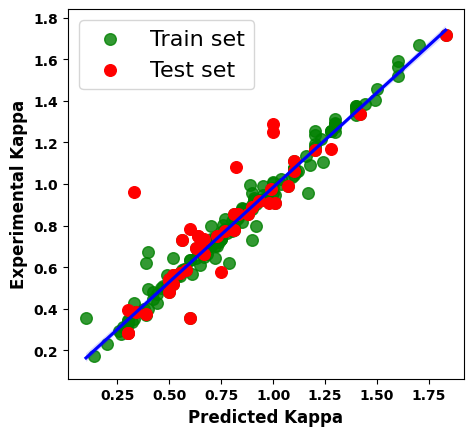

In [ ]:
sns.regplot(x=y_train, y=catboost_reg.predict(x_train), color='g', scatter_kws={'s': 70},
            line_kws={'color': 'blue'}, label='Train set')
plt.scatter(y_test, catboost_pred_test, color='r', s=70, label='Test set')

plt.xlabel('Predicted Kappa', fontsize=12, weight='bold')
plt.ylabel('Experimental Kappa', fontsize=12, weight='bold')
plt.gca().set_aspect('equal', adjustable='box')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.legend(fontsize=16)
plt.show()

In [ ]:
param_dist = {
    'iterations': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'depth': [3, 5, 7, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'border_count': [32, 64, 128],
    'subsample': [0.8, 0.9, 1.0],
}
catboost_reg = CatBoostRegressor(random_state=42, verbose=False)
catboost_random = RandomizedSearchCV(estimator=catboost_reg, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, random_state=95)
catboost_random.fit(x_train, y_train)
best_estimator_catboost = catboost_random.best_estimator_
catboost_pred_test = best_estimator_catboost.predict(x_test)
catboost_pred_train = best_estimator_catboost.predict(x_train)
catboost_rmse_test = sqrt(mean_squared_error(y_test, catboost_pred_test))
catboost_mae_test = mean_absolute_error(y_test, catboost_pred_test)
catboost_r2_test = r2_score(y_test, catboost_pred_test)
catboost_rmse_train = sqrt(mean_squared_error(y_train, catboost_pred_train))
catboost_mae_train = mean_absolute_error(y_train, catboost_pred_train)
catboost_r2_train = r2_score(y_train, catboost_pred_train)
print("Min Test RMSE for CatBoost:", catboost_rmse_test)
print("Min Test MAE for CatBoost:", catboost_mae_test)
print("Max Test R2 for CatBoost:", catboost_r2_test)
print("Min Train RMSE for CatBoost:", catboost_rmse_train)
print("Min Train MAE for CatBoost:", catboost_mae_train)
print("Max Train R2 for CatBoost:", catboost_r2_train)

Min Test RMSE for CatBoost: 0.2147736196669163
Min Test MAE for CatBoost: 0.16529272128645375
Max Test R2 for CatBoost: 0.5409055188219367
Min Train RMSE for CatBoost: 0.22001237127690576
Min Train MAE for CatBoost: 0.17597228907693563
Max Train R2 for CatBoost: 0.6076916693217931


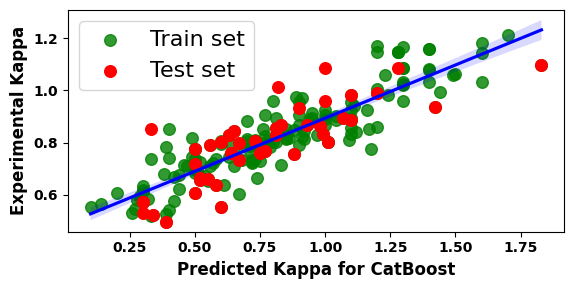

In [ ]:
sns.regplot(x=y_train, y=best_estimator_catboost.predict(x_train), color='g', scatter_kws={'s': 70},
            line_kws={'color': 'blue'}, label='Train set')
plt.scatter(y_test, catboost_pred_test, color='r', s=70, label='Test set')

plt.xlabel('Predicted Kappa for CatBoost', fontsize=12, weight='bold')
plt.ylabel('Experimental Kappa', fontsize=12, weight='bold')
plt.gca().set_aspect('equal', adjustable='box')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.legend(fontsize=16)
plt.show()

In [ ]:
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
regressor = CatBoostRegressor(silent=True)  
iterations = [100, 500, 1000, 1500, 2000]  
learning_rates = [0.01, 0.05, 0.1, 0.15, 0.2]  
depth = [3, 4, 5, 6, 7, 8, 9, 10] 
l2_leaf_reg = [1, 3, 5, 7, 9, 10]  
subsample = [0.5, 0.7, 0.9, 1.0]  
catboost_randomgrid = {
    'iterations': iterations,
    'learning_rate': learning_rates,
    'depth': depth,
    'l2_leaf_reg': l2_leaf_reg,
    'subsample': subsample,
}
randomcv_catboost = RandomizedSearchCV(estimator=regressor,
                                       param_distributions=catboost_randomgrid,
                                       n_iter=100,
                                       scoring='neg_mean_absolute_error',
                                       n_jobs=4,
                                       cv=5,
                                       verbose=5,
                                       return_train_score=True,
                                       random_state=13)

randomcv_catboost.fit(x_train, y_train)
best_randomcv_catboost = randomcv_catboost.best_estimator_
reg_catboost = best_randomcv_catboost.fit(x_train, y_train)
pred_catboost_randombest = best_randomcv_catboost.predict(x_test)
pred_catboost_train = best_randomcv_catboost.predict(x_train)
catboost_randombestTEST_rmse = sqrt(mean_squared_error(y_test, pred_catboost_randombest))
catboost_randombestTEST_mae = mean_absolute_error(y_test, pred_catboost_randombest)
catboost_r2_test = r2_score(y_test, pred_catboost_randombest)
catboost_randombestTRAIN_rmse = sqrt(mean_squared_error(y_train, pred_catboost_train))
catboost_randombestTRAIN_mae = mean_absolute_error(y_train, pred_catboost_train)
catboost_r2_train = r2_score(y_train, pred_catboost_train)
print("Train RMSE:", catboost_randombestTRAIN_rmse)
print("Train MAE:", catboost_randombestTRAIN_mae)
print("Train R2:", catboost_r2_train)
print("Test RMSE:", catboost_randombestTEST_rmse)
print("Test MAE:", catboost_randombestTEST_mae)
print("Test R2:", catboost_r2_test)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Train RMSE: 0.04302898907402318
Train MAE: 0.01159565055894302
Train R2: 0.9849943223589342
Test RMSE: 0.15008745762715667
Test MAE: 0.06928670407292409
Test R2: 0.7758034108607624


##GBR

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
gbr_pred_test = gbr.predict(x_test)
gbr_pred_train = gbr.predict(x_train)
gbr_rmse_test = sqrt(mean_squared_error(y_test, gbr_pred_test))
gbr_mae_test = mean_absolute_error(y_test, gbr_pred_test)
gbr_r2_test = r2_score(y_test, gbr_pred_test)
gbr_rmse_train = sqrt(mean_squared_error(y_train, gbr_pred_train))
gbr_mae_train = mean_absolute_error(y_train, gbr_pred_train)
gbr_r2_train = r2_score(y_train, gbr_pred_train)
print("Min Test RMSE for GBR:", gbr_rmse_test)
print("Min Test MAE for GBR:", gbr_mae_test)
print("Max Test R2 for GBR:", gbr_r2_test)
print("Min Train RMSE for GBR:", gbr_rmse_train)
print("Min Train MAE for GBR:", gbr_mae_train)
print("Max Train R2 for GBR:", gbr_r2_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Min Test RMSE for GBR: 0.17938353352304662
Min Test MAE for GBR: 0.13348134823387375
Max Test R2 for GBR: 0.6797380466826191
Min Train RMSE for GBR: 0.13307548528875346
Min Train MAE for GBR: 0.09731950760669764
Max Train R2 for GBR: 0.8564743759110138


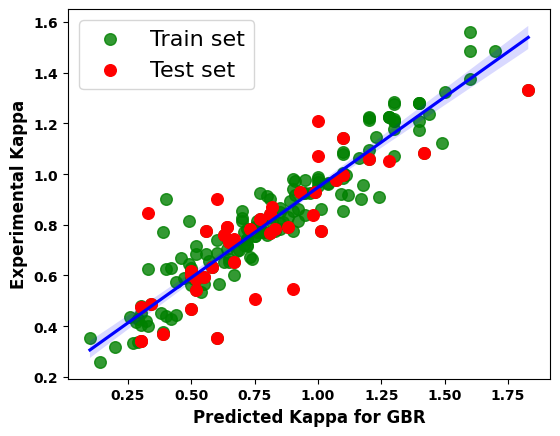

In [ ]:
sns.regplot(x=y_train, y=gbr.predict(x_train), color='g', scatter_kws={'s': 70},
            line_kws={'color': 'blue'}, label='Train set')
plt.scatter(y_test, gbr_pred_test, color='r', s=70, label='Test set')

plt.xlabel('Predicted Kappa for GBR', fontsize=12, weight='bold')
plt.ylabel('Experimental Kappa', fontsize=12, weight='bold')
plt.gca().set_aspect('equal', adjustable='box')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.legend(fontsize=16)
plt.show()

In [ ]:
param_dist = {
    'n_estimators': [100, 500, 900, 1100, 1500, 2000, 2200, 2300, 2400, 2500, 2600],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.20],
    'max_depth': [2, 3, 5, 10, 15, 20, 25],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 100, 150],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'subsample': [0.8, 0.9, 1.0],
    'loss': ['ls', 'lad', 'huber', 'quantile'],
    'alpha': [0.9, 0.95, 0.99],
}
gbr = GradientBoostingRegressor() 
gbr_random = RandomizedSearchCV(estimator=gbr, param_distributions=param_dist, n_iter=10,
                                 scoring='neg_mean_squared_error', cv=5, random_state=92)

gbr_random.fit(x_train, y_train)
best_estimator_gbr = gbr_random.best_estimator_
gbr_pred_test = best_estimator_gbr.predict(x_test)
gbr_pred_train = best_estimator_gbr.predict(x_train)
gbr_rmse_test = sqrt(mean_squared_error(y_test, gbr_pred_test))
gbr_mae_test = mean_absolute_error(y_test, gbr_pred_test)
gbr_r2_test = r2_score(y_test, gbr_pred_test)
gbr_rmse_train = sqrt(mean_squared_error(y_train, gbr_pred_train))
gbr_mae_train = mean_absolute_error(y_train, gbr_pred_train)
gbr_r2_train = r2_score(y_train, gbr_pred_train)
print("Best Hyperparameters for GBR:", gbr_random.best_params_)
print("Min Test RMSE for GBR:", gbr_rmse_test)
print("Min Test MAE for GBR:", gbr_mae_test)
print("Max Test R2 for GBR:", gbr_r2_test)
print("Min Train RMSE for GBR:", gbr_rmse_train)
print("Min Train MAE for GBR:", gbr_mae_train)
print("Max Train R2 for GBR:", gbr_r2_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a

Best Hyperparameters for GBR: {'subsample': 0.8, 'n_estimators': 2200, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_depth': 25, 'loss': 'huber', 'learning_rate': 0.05, 'alpha': 0.9}
Min Test RMSE for GBR: 0.16455852544707145
Min Test MAE for GBR: 0.07957291087832712
Max Test R2 for GBR: 0.7304862211696008
Min Train RMSE for GBR: 0.05775120312297572
Min Train MAE for GBR: 0.011450743137764592
Max Train R2 for GBR: 0.9729694178364537


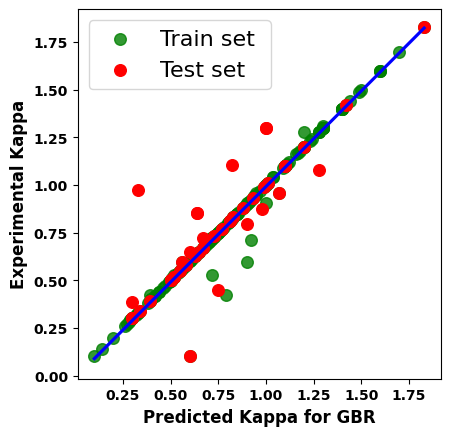

In [ ]:
sns.regplot(x=y_train, y=best_estimator_gbr.predict(x_train), color='g', scatter_kws={'s': 70},
            line_kws={'color': 'blue'}, label='Train set ')
plt.scatter(y_test, gbr_pred_test, color='r', s=70, label='Test set')

plt.xlabel('Predicted Kappa for GBR', fontsize=12, weight='bold')
plt.ylabel('Experimental Kappa', fontsize=12, weight='bold')
plt.gca().set_aspect('equal', adjustable='box')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.legend(fontsize=16)
plt.show()

##ETR

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
etr = ExtraTreesRegressor()
etr.fit(x_train, y_train)
etr_pred_test = etr.predict(x_test)
etr_pred_train = etr.predict(x_train)
etr_rmse_test = sqrt(mean_squared_error(y_test, etr_pred_test))
etr_mae_test = mean_absolute_error(y_test, etr_pred_test)
etr_r2_test = r2_score(y_test, etr_pred_test)
etr_rmse_train = sqrt(mean_squared_error(y_train, etr_pred_train))
etr_mae_train = mean_absolute_error(y_train, etr_pred_train)
etr_r2_train = r2_score(y_train, etr_pred_train)
print("Min Test RMSE for ETR:", etr_rmse_test)
print("Min Test MAE for ETR:", etr_mae_test)
print("Max Test R2 for ETR:", etr_r2_test)
print("Min Train RMSE for ETR:", etr_rmse_train)
print("Min Train MAE for ETR:", etr_mae_train)
print("Max Train R2 for ETR:", etr_r2_train)


Min Test RMSE for ETR: 0.13286597310482026
Min Test MAE for ETR: 0.06367590909090944
Max Test R2 for ETR: 0.8243016252156595
Min Train RMSE for ETR: 0.04302822993603817
Min Train MAE for ETR: 0.011428571428572327
Max Train R2 for ETR: 0.9849948518289333


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


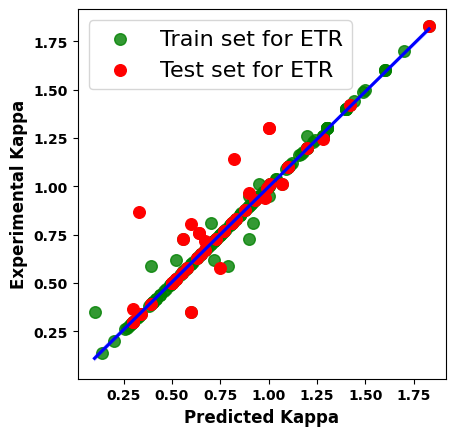

In [ ]:
sns.regplot(x=y_train, y=etr.predict(x_train), color='g', scatter_kws={'s': 70},
            line_kws={'color': 'blue'}, label='Train set for ETR')
plt.scatter(y_test, etr_pred_test, color='r', s=70, label='Test set for ETR')

plt.xlabel('Predicted Kappa', fontsize=12, weight='bold')
plt.ylabel('Experimental Kappa', fontsize=12, weight='bold')
plt.gca().set_aspect('equal', adjustable='box')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.legend(fontsize=16)
plt.show()

In [ ]:
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
regressor = ExtraTreesRegressor()
n_estimators = [100, 200, 500, 1000, 1500, 2000]
max_depth = [3, 5, 10, 15, 20, 25, 30]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
max_features = ['auto', 'sqrt', 'log2', None]
bootstrap = [True, False]
etr_randomgrid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_features': max_features,
    'bootstrap': bootstrap
}
randomcv_etr = RandomizedSearchCV(estimator=regressor,
                                  param_distributions=etr_randomgrid,
                                  n_iter=100,
                                  scoring='neg_mean_absolute_error',
                                  n_jobs=4,
                                  cv=5,
                                  verbose=5,
                                  return_train_score=True,
                                  random_state=13)

randomcv_etr.fit(x_train, y_train)
best_randomcv_etr = randomcv_etr.best_estimator_
reg_etr = best_randomcv_etr.fit(x_train, y_train)
pred_etr_randombest = best_randomcv_etr.predict(x_test)
pred_etr_train = best_randomcv_etr.predict(x_train)
etr_randombestTEST_rmse = sqrt(mean_squared_error(y_test, pred_etr_randombest))
etr_randombestTEST_mae = mean_absolute_error(y_test, pred_etr_randombest)
etr_r2_test = r2_score(y_test, pred_etr_randombest)
etr_randombestTRAIN_rmse = sqrt(mean_squared_error(y_train, pred_etr_train))
etr_randombestTRAIN_mae = mean_absolute_error(y_train, pred_etr_train)
etr_r2_train = r2_score(y_train, pred_etr_train)
print("Train RMSE:", etr_randombestTRAIN_rmse)
print("Train MAE:", etr_randombestTRAIN_mae)
print("Train R2:", etr_r2_train)
print("Test RMSE:", etr_randombestTEST_rmse)
print("Test MAE:", etr_randombestTEST_mae)
print("Test R2:", etr_r2_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
135 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Train RMSE: 0.1589246841647783
Train MAE: 0.1115937231038162
Train R2: 0.7953008492778679
Test RMSE: 0.1850114268418196
Test MAE: 0.13088738247129086
Test R2: 0.6593273223367782


##AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
adaboost_reg = AdaBoostRegressor()
adaboost_reg.fit(x_train, y_train)
adaboost_pred_test = adaboost_reg.predict(x_test)
adaboost_pred_train = adaboost_reg.predict(x_train)
adaboost_rmse_test = sqrt(mean_squared_error(y_test, adaboost_pred_test))
adaboost_mae_test = mean_absolute_error(y_test, adaboost_pred_test)
adaboost_r2_test = r2_score(y_test, adaboost_pred_test)
adaboost_rmse_train = sqrt(mean_squared_error(y_train, adaboost_pred_train))
adaboost_mae_train = mean_absolute_error(y_train, adaboost_pred_train)
adaboost_r2_train = r2_score(y_train, adaboost_pred_train)
print("Min Test RMSE for AdaBoost:", adaboost_rmse_test)
print("Min Test MAE for AdaBoost:", adaboost_mae_test)
print("Max Test R2 for AdaBoost:", adaboost_r2_test)
print("Min Train RMSE for AdaBoost:", adaboost_rmse_train)
print("Min Train MAE for AdaBoost:", adaboost_mae_train)
print("Max Train R2 for AdaBoost:", adaboost_r2_train)


Min Test RMSE for AdaBoost: 0.23420645332790274
Min Test MAE for AdaBoost: 0.1970690344806891
Max Test R2 for AdaBoost: 0.4540688013035018
Min Train RMSE for AdaBoost: 0.25582636823820765
Min Train MAE for AdaBoost: 0.22467170975019518
Max Train R2 for AdaBoost: 0.4695750576236857


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


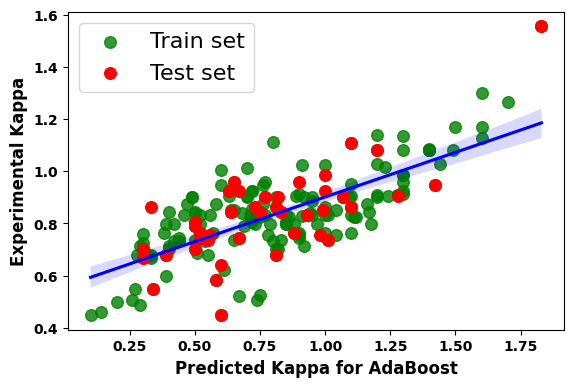

In [ ]:
sns.regplot(x=y_train, y=adaboost_reg.predict(x_train), color='g', scatter_kws={'s': 70},
            line_kws={'color': 'blue'}, label='Train set')
plt.scatter(y_test, adaboost_pred_test, color='r', s=70, label='Test set')

plt.xlabel('Predicted Kappa for AdaBoost', fontsize=12, weight='bold')
plt.ylabel('Experimental Kappa', fontsize=12, weight='bold')
plt.gca().set_aspect('equal', adjustable='box')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.legend(fontsize=16)
plt.show()

In [ ]:
adaboost_reg.get_params()

{'estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 50,
 'random_state': None}

In [ ]:
param_dist = {
    'n_estimators': [10, 50, 100, 150, 200, 300, 500, 700, 900, 1200, 1500],
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 1, 2, 5, 10],
    'loss': ['linear', 'square', 'exponential'],
    'random_state': [148]
}

adaboost_random = RandomizedSearchCV(estimator=AdaBoostRegressor(), param_distributions=param_dist, random_state=92)
adaboost_random.fit(x_train, y_train)
best_randomgrid_adaboost = adaboost_random.best_estimator_
y_train_pred = adaboost_random.predict(x_train)
y_test_pred = adaboost_random.predict(x_test)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Training MAE: {train_mae:.2f}, Training RMSE: {train_rmse:.2f}, Training R2 score: {train_r2:.2f}")
print(f"Testing MAE: {test_mae:.2f}, Testing RMSE: {test_rmse:.2f}, Testing R2 score: {test_r2:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Training MAE: 0.23, Training RMSE: 0.28, Training R2 score: 0.35
Testing MAE: 0.20, Testing RMSE: 0.26, Testing R2 score: 0.34


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


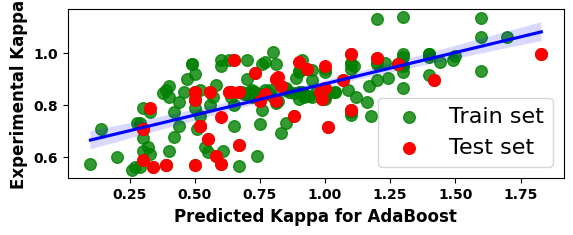

In [ ]:
sns.regplot(x=y_train, y=y_train_pred, color='g', scatter_kws={'s': 70}, line_kws={'color': 'blue'}, label='Train set')
plt.scatter(y_test, y_test_pred, color='r', s=70, label='Test set')
plt.xlabel('Predicted Kappa for AdaBoost', fontsize=12, weight='bold')
plt.ylabel('Experimental Kappa', fontsize=12, weight='bold')
plt.gca().set_aspect('equal', adjustable='box')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.legend(fontsize=16)
plt.rcParams['figure.dpi'] = 500
plt.show()

In [ ]:
adaboost_random.best_params_

{'random_state': 148,
 'n_estimators': 100,
 'loss': 'exponential',
 'learning_rate': 0.1}

In [ ]:
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
regressor = AdaBoostRegressor()
n_estimators = [50, 100, 200, 300, 500, 1000]
learning_rate = [0.01, 0.05, 0.1, 0.15, 0.2, 0.5, 1.0]
loss = ['linear', 'square', 'exponential']
abr_randomgrid = {
    'n_estimators': n_estimators,
    'learning_rate': learning_rate,
    'loss': loss
}
randomcv_abr = RandomizedSearchCV(estimator=regressor,
                                  param_distributions=abr_randomgrid,
                                  n_iter=100,
                                  scoring='neg_mean_absolute_error',
                                  n_jobs=4,
                                  cv=5,
                                  verbose=5,
                                  return_train_score=True,
                                  random_state=13)

randomcv_abr.fit(x_train, y_train)
best_randomcv_abr = randomcv_abr.best_estimator_
reg_abr = best_randomcv_abr.fit(x_train, y_train)
pred_abr_randombest = best_randomcv_abr.predict(x_test)
pred_abr_train = best_randomcv_abr.predict(x_train)
abr_randombestTEST_rmse = sqrt(mean_squared_error(y_test, pred_abr_randombest))
abr_randombestTEST_mae = mean_absolute_error(y_test, pred_abr_randombest)
abr_r2_test = r2_score(y_test, pred_abr_randombest)
abr_randombestTRAIN_rmse = sqrt(mean_squared_error(y_train, pred_abr_train))
abr_randombestTRAIN_mae = mean_absolute_error(y_train, pred_abr_train)
abr_r2_train = r2_score(y_train, pred_abr_train)
print("Train RMSE:", abr_randombestTRAIN_rmse)
print("Train MAE:", abr_randombestTRAIN_mae)
print("Train R2:", abr_r2_train)
print("Test RMSE:", abr_randombestTEST_rmse)
print("Test MAE:", abr_randombestTEST_mae)
print("Test R2:", abr_r2_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train RMSE: 0.27562121458935807
Train MAE: 0.23211169855057717
Train R2: 0.38431494579063397
Test RMSE: 0.24980954627584387
Test MAE: 0.2006180037993997
Test R2: 0.3789046751969912


##RFR

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
rfr_pred_test = rfr.predict(x_test)
rfr_pred_train = rfr.predict(x_train)
rfr_rmse_test = sqrt(mean_squared_error(y_test, rfr_pred_test))
rfr_mae_test = mean_absolute_error(y_test, rfr_pred_test)
rfr_r2_test = r2_score(y_test, rfr_pred_test)
rfr_rmse_train = sqrt(mean_squared_error(y_train, rfr_pred_train))
rfr_mae_train = mean_absolute_error(y_train, rfr_pred_train)
rfr_r2_train = r2_score(y_train, rfr_pred_train)
print("Min Test RMSE for RFR:", rfr_rmse_test)
print("Min Test MAE for RFR:", rfr_mae_test)
print("Max Test R2 for RFR:", rfr_r2_test)
print("Min Train RMSE for RFR:", rfr_rmse_train)
print("Min Train MAE for RFR:", rfr_mae_train)
print("Max Train R2 for RFR:", rfr_r2_train)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Min Test RMSE for RFR: 0.14315424148364328
Min Test MAE for RFR: 0.10802650793650771
Max Test R2 for RFR: 0.7960382923805933
Min Train RMSE for RFR: 0.12758554517682424
Min Train MAE for RFR: 0.10032374240362811
Max Train R2 for RFR: 0.8680722139993615


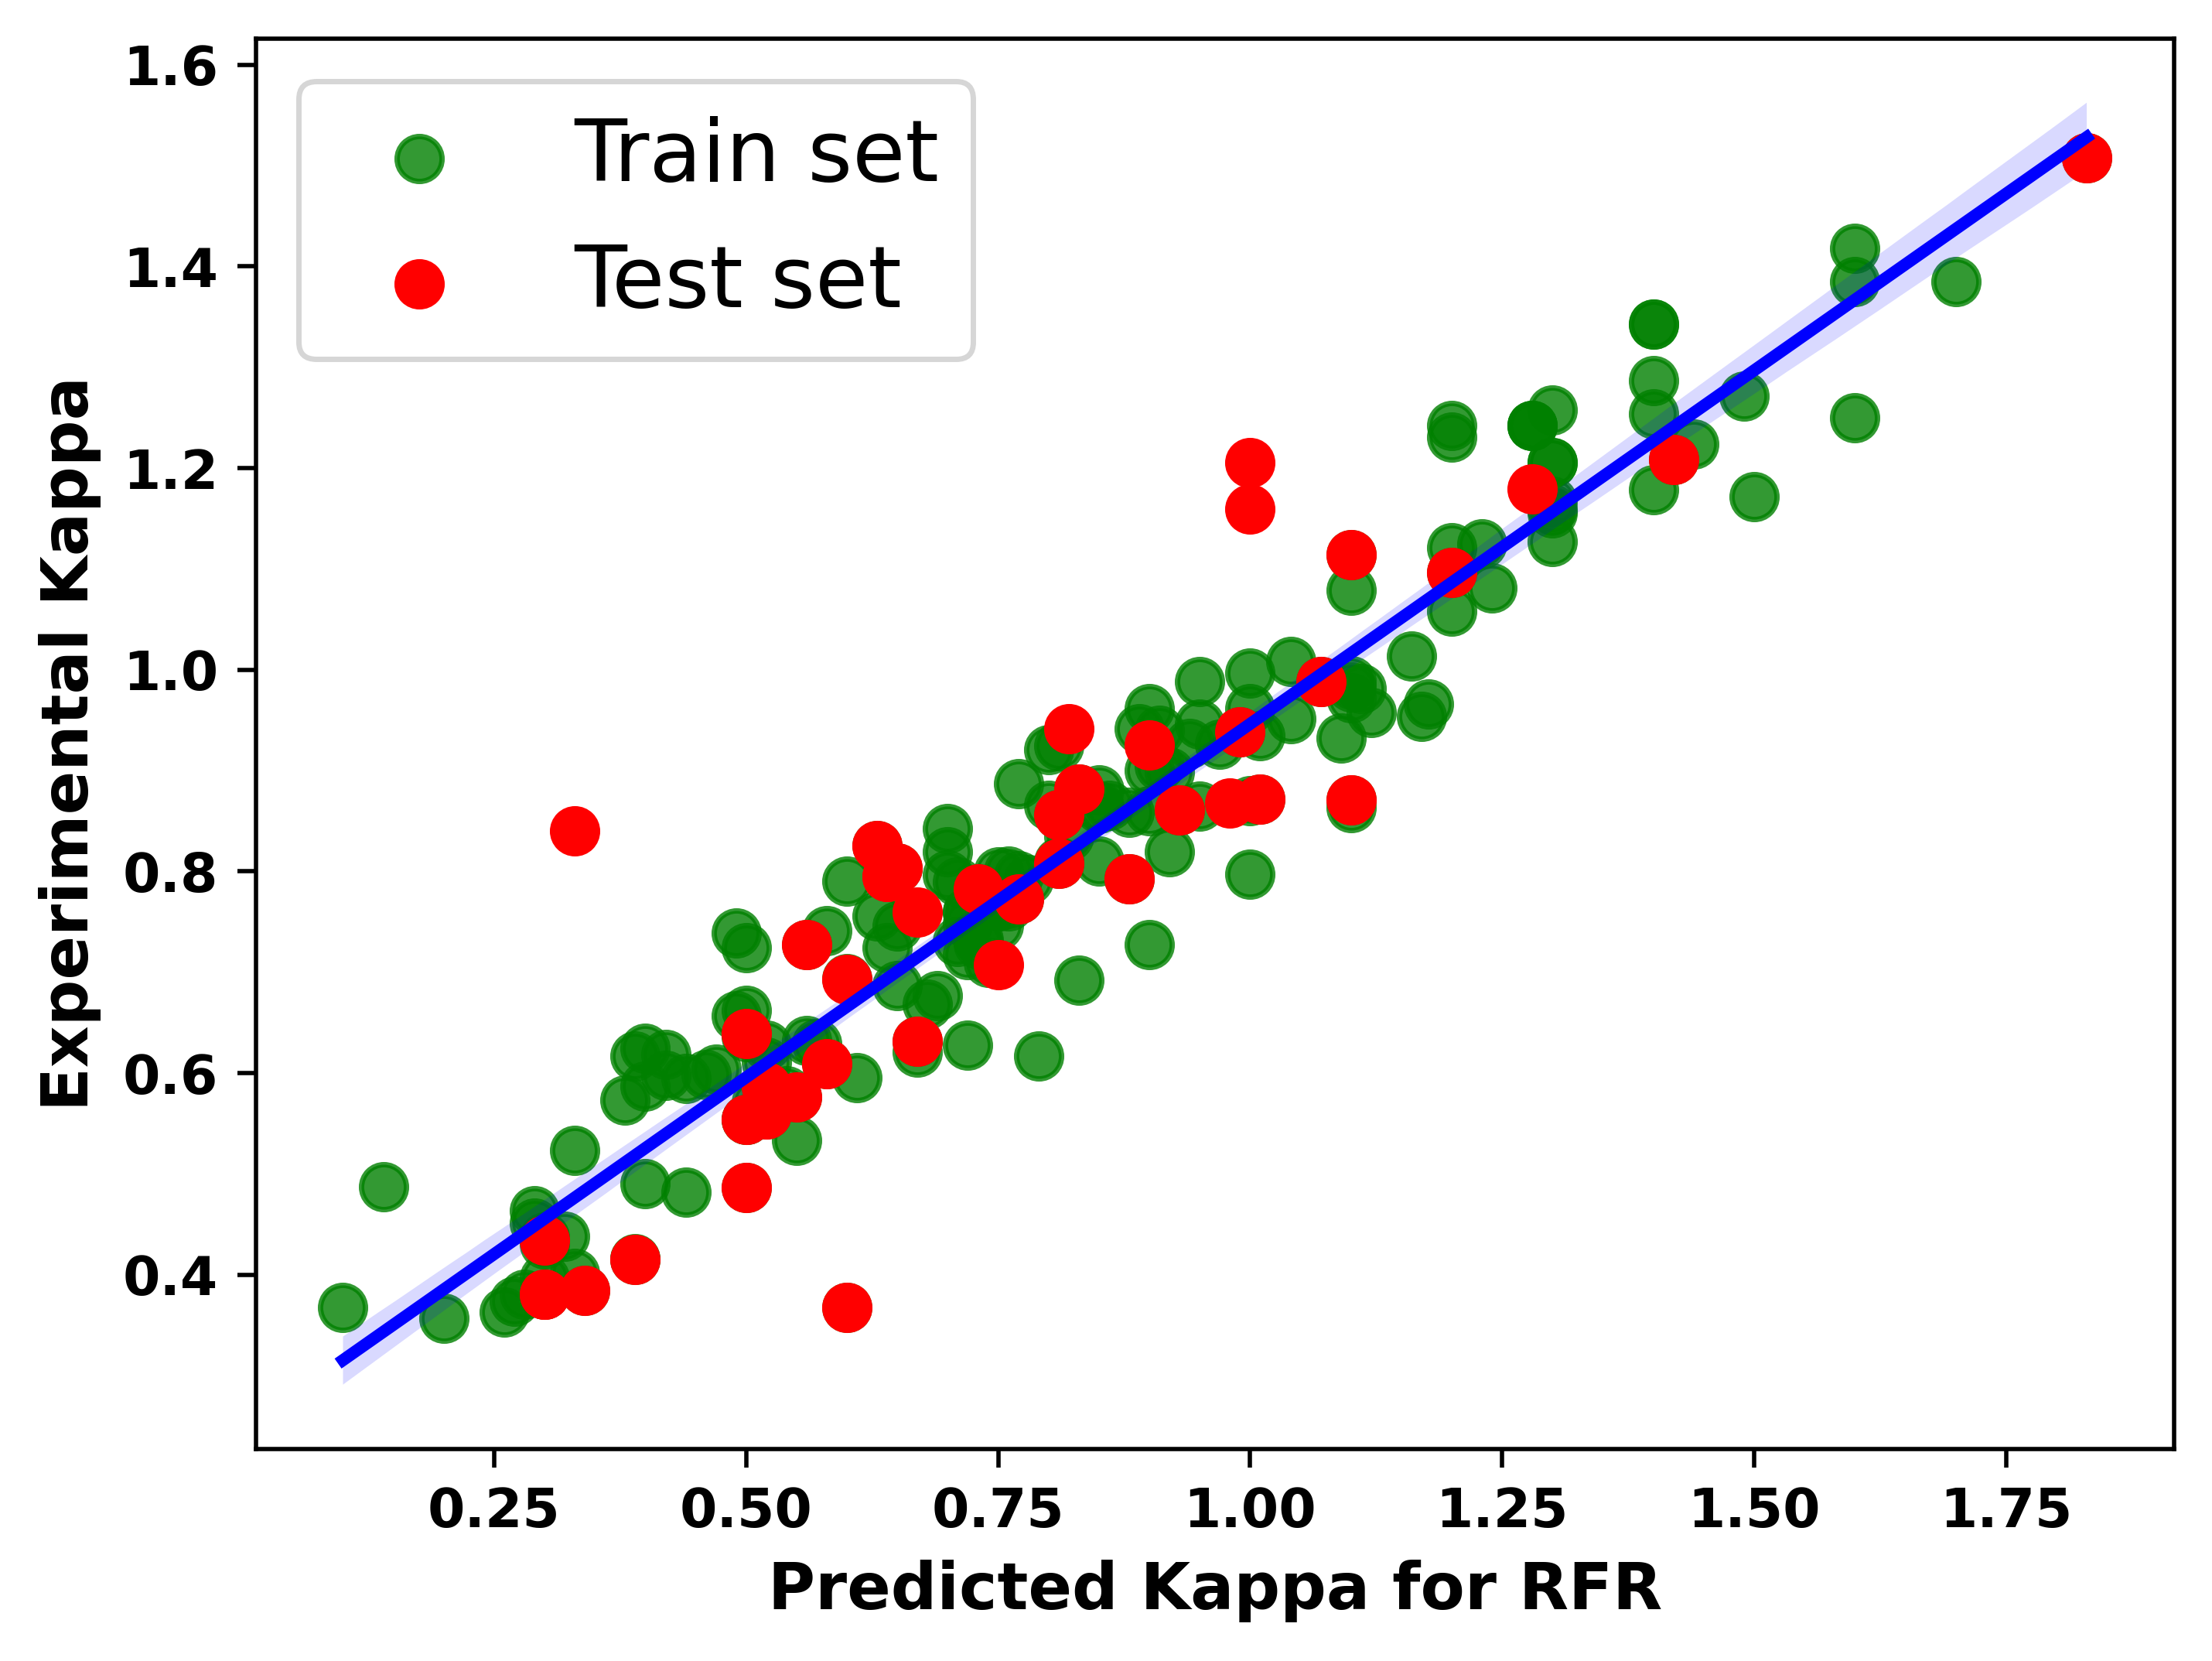

In [ ]:
sns.regplot(x=y_train, y=rfr.predict(x_train), color='g', scatter_kws={'s': 70},
            line_kws={'color': 'blue'}, label='Train set')
plt.scatter(y_test, rfr_pred_test, color='r', s=70, label='Test set')

plt.xlabel('Predicted Kappa for RFR', fontsize=12, weight='bold')
plt.ylabel('Experimental Kappa', fontsize=12, weight='bold')
plt.gca().set_aspect('equal', adjustable='box')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.legend(fontsize=16)
plt.show()

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
regressor = RandomForestRegressor()
n_estimators = [100, 200, 500, 1000, 1200, 1500, 1800, 2000]
max_depth = [10, 20, 30, 40, 50, 60, 70, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
rfr_randomgrid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}
randomcv_rfr = RandomizedSearchCV(estimator=regressor,
                                  param_distributions=rfr_randomgrid,
                                  n_iter=100,
                                  scoring='neg_mean_absolute_error',
                                  n_jobs=4,
                                  cv=5,
                                  verbose=5,
                                  return_train_score=True,
                                  random_state=13)

randomcv_rfr.fit(x_train, y_train)
best_randomcv_rfr = randomcv_rfr.best_estimator_
reg_rfr = best_randomcv_rfr.fit(x_train, y_train)
pred_rfr_randombest = best_randomcv_rfr.predict(x_test)
pred_rfr_train = best_randomcv_rfr.predict(x_train)
rfr_randombestTEST_rmse = sqrt(mean_squared_error(y_test, pred_rfr_randombest))
rfr_randombestTEST_mae = mean_absolute_error(y_test, pred_rfr_randombest)
rfr_r2_test = r2_score(y_test, pred_rfr_randombest)
rfr_randombestTRAIN_rmse = sqrt(mean_squared_error(y_train, pred_rfr_train))
rfr_randombestTRAIN_mae = mean_absolute_error(y_train, pred_rfr_train)
rfr_r2_train = r2_score(y_train, pred_rfr_train)
print("Train RMSE:", rfr_randombestTRAIN_rmse)
print("Train MAE:", rfr_randombestTRAIN_mae)
print("Train R2:", rfr_r2_train)
print("Test RMSE:", rfr_randombestTEST_rmse)
print("Test MAE:", rfr_randombestTEST_mae)
print("Test R2:", rfr_r2_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train RMSE: 0.12995984581908257
Train MAE: 0.10239150039547722
Train R2: 0.8631163107544453
Test RMSE: 0.14943340091225735
Test MAE: 0.11096232002593277
Test R2: 0.7777531776991933


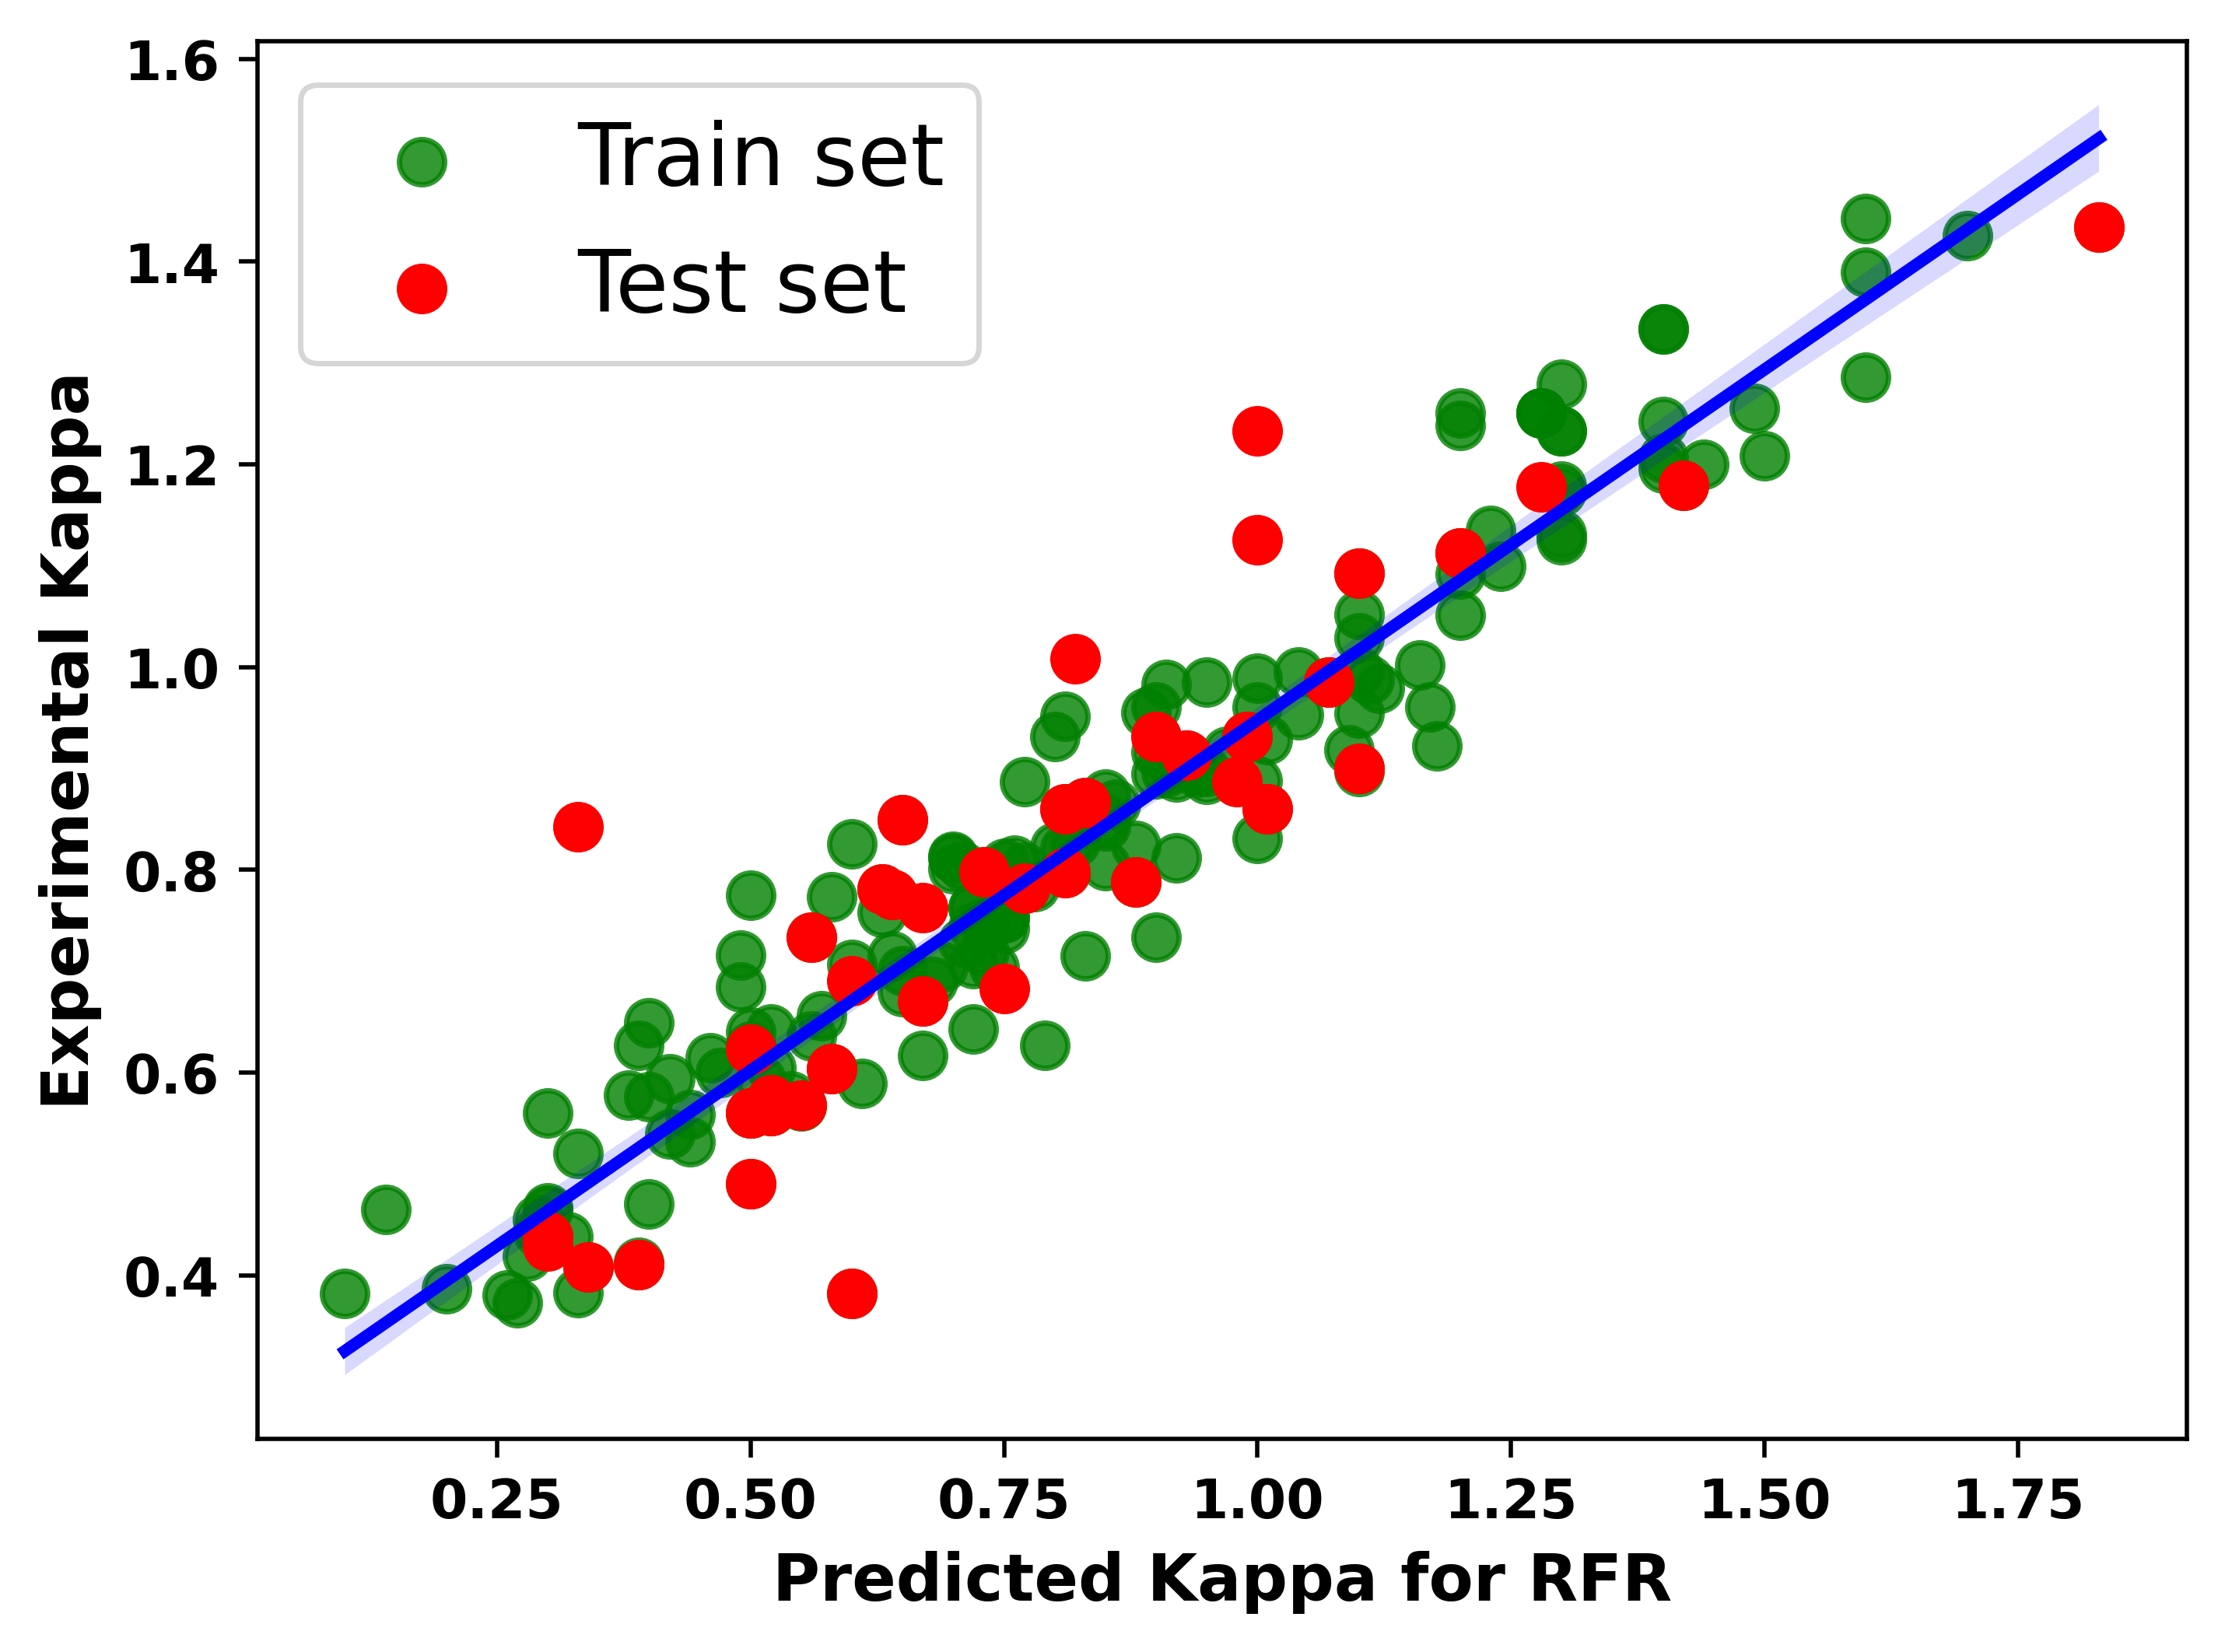

In [ ]:
sns.regplot(x=y_train, y=best_randomcv_rfr.predict(x_train), color='g', scatter_kws={'s': 70},
            line_kws={'color': 'blue'}, label='Train set')
plt.scatter(y_test, pred_rfr_randombest, color='r', s=70, label='Test set')

plt.xlabel('Predicted Kappa for RFR', fontsize=12, weight='bold')
plt.ylabel('Experimental Kappa', fontsize=12, weight='bold')
plt.gca().set_aspect('equal', adjustable='box')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.legend(fontsize=16)
plt.show()

##XGBR

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import xgboost as xgb
xg_reg = xgb.XGBRegressor()
xg_reg.fit(x_train, y_train)
xg_pred_test = xg_reg.predict(x_test)
xg_pred_train = xg_reg.predict(x_train)
xg_rmse_test = sqrt(mean_squared_error(y_test, xg_pred_test))
xg_mae_test = mean_absolute_error(y_test, xg_pred_test)
xg_r2_test = r2_score(y_test, xg_pred_test)
xg_rmse_train = sqrt(mean_squared_error(y_train, xg_pred_train))
xg_mae_train = mean_absolute_error(y_train, xg_pred_train)
xg_r2_train = r2_score(y_train, xg_pred_train)
print("Min Test RMSE:", xg_rmse_test)
print("Min Test MAE:", xg_mae_test)
print("Max Test R2:", xg_r2_test)
print("Min Train RMSE:", xg_rmse_train)
print("Min Train MAE:", xg_mae_train)
print("Max Train R2:", xg_r2_train)

Min Test RMSE: 0.13534901204929975
Min Test MAE: 0.0675935678861358
Max Test R2: 0.8176732659339905
Min Train RMSE: 0.043050591462691454
Min Train MAE: 0.01221347758156913
Max Train R2: 0.9849792718887329


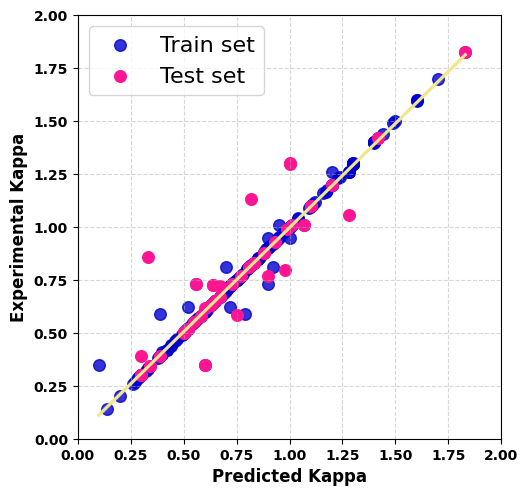

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5.5, 5.5))
plt.grid(True, linestyle='--', alpha=0.5)
sns.regplot(x=y_train, y=xg_pred_train, color='mediumblue', scatter_kws={'s': 70},
            line_kws={'color': 'khaki'}, label='Train set')

plt.scatter(y_test, xg_pred_test, color='deeppink', s=70, label='Test set')

plt.xlabel('Predicted Kappa', fontsize=12, weight='bold')
plt.ylabel('Experimental Kappa', fontsize=12, weight='bold')
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.gca().set_aspect('equal', adjustable='box')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.legend(fontsize=16)
plt.show()

In [ ]:
xg_reg.get_xgb_params

<bound method XGBModel.get_xgb_params of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)>

In [ ]:
regressor = xgb.XGBRegressor()
booster = ['gbtree', 'bglinear']
base_score = [-0.75, -0.50, -0.25,0,0.10,0.25,0.5,0.75,1, 1.25,1.35,1.45,1.50]
n_estimators = [100, 500, 900, 1100, 1500,2000,2200,2300,2400,2500,2600]
max_depth = [2,3,5,10,15,20,25]
booster = ['gbtree', 'bglinear']
learning_rate=[0.01,0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4,5,6,7,8,9,10]
cv = [1, 2, 3, 4, 5, 10]
verbose = [ 5, 10,15,20,25,50,60,70,80]

xgb_randomgrid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'learning_rate': learning_rate,
    'min_child_weight': min_child_weight,
    'booster': booster,
    'base_score': base_score,
    'cv': cv,
    'verbose': verbose
    }
from sklearn.model_selection import RandomizedSearchCV
randomcv_xgbr = RandomizedSearchCV(estimator=regressor,
                                   param_distributions=xgb_randomgrid,
                                   n_iter=100,
                                   scoring = 'neg_mean_absolute_error',
                                   n_jobs = 4, cv =3, verbose =5,
                                   return_train_score = True,
                                   random_state=13)


randomcv_xgbr.fit(x_train, y_train)
best_randomcv_xgb = randomcv_xgbr.best_estimator_
reg_xg = best_randomcv_xgb.fit(x_train,y_train)
pred_xgbr_randombest = best_randomcv_xgb.predict(x_test)
pred_xgbr_train = best_randomcv_xgb.predict(x_train)
xgbr_randombestTEST_rmse = sqrt(mean_squared_error(y_test, pred_xgbr_randombest))
xgbr_randombestTEST_mae = mean_absolute_error(y_test, pred_xgbr_randombest)
xg_r2_test = r2_score(y_test, pred_xgbr_randombest)
xgbr_randombestTRAIN_rmse = sqrt(mean_squared_error(y_train, pred_xgbr_train))
xgbr_randombestTRAIN_mae = mean_absolute_error(y_train, pred_xgbr_train)
xg_r2_train = r2_score(y_train, pred_xgbr_train)
print("Train RMSE:", xgbr_randombestTRAIN_rmse)
print("Train MAE", xgbr_randombestTRAIN_mae)
print("Train R2:", xg_r2_train)
print("Test RMSE", xgbr_randombestTEST_rmse)
print("Test MAE", xgbr_randombestTEST_mae)
print("Test R2:", xg_r2_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
126 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1108, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 726, in inner_f
 

Train RMSE: 0.043034467365365384
Train MAE 0.011884894879204888
Train R2: 0.9849904775619507
Test RMSE 0.12328196525521258
Test MAE 0.06124840958551927
Test R2: 0.8487347364425659


In [ ]:
regressor = xgb.XGBRegressor()
booster = ['gbtree', 'bglinear']
base_score = [-0.75, -0.50, -0.25,0,0.10,0.25,0.5,0.75,1, 1.25,1.35,1.45,1.50]
n_estimators = [100, 500, 900, 1100, 1500,2000,2200,2300,2400,2500,2600]
max_depth = [2,3,5,10,15,20,25]
booster = ['gbtree', 'bglinear']
learning_rate=[0.01,0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4,5,6,7,8,9,10]
cv = [1, 2, 3, 4, 5, 10]
verbose = [ 5, 10,15,20,25,50,60,70,80]
xgb_randomgrid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'learning_rate': learning_rate,
    'min_child_weight': min_child_weight,
    'booster': booster,
    'base_score': base_score,
    'cv': cv,
    'verbose': verbose
    }
from sklearn.model_selection import RandomizedSearchCV
randomcv_xgbr = RandomizedSearchCV(estimator=regressor,
                                   param_distributions=xgb_randomgrid,
                                   n_iter=100,
                                   scoring = 'neg_mean_absolute_error',
                                   n_jobs = 4, cv =5, verbose =5,
                                   return_train_score = True,
                                   random_state=13)


randomcv_xgbr.fit(x_train, y_train)
best_randomcv_xgb = randomcv_xgbr.best_estimator_
reg_xg = best_randomcv_xgb.fit(x_train,y_train)
pred_xgbr_randombest = best_randomcv_xgb.predict(x_test)
pred_xgbr_train = best_randomcv_xgb.predict(x_train)
xgbr_randombestTEST_rmse = sqrt(mean_squared_error(y_test, pred_xgbr_randombest))
xgbr_randombestTEST_mae = mean_absolute_error(y_test, pred_xgbr_randombest)
xg_r2_test = r2_score(y_test, pred_xgbr_randombest)
xgbr_randombestTRAIN_rmse = sqrt(mean_squared_error(y_train, pred_xgbr_train))
xgbr_randombestTRAIN_mae = mean_absolute_error(y_train, pred_xgbr_train)
xg_r2_train = r2_score(y_train, pred_xgbr_train)
print("Train RMSE:", xgbr_randombestTRAIN_rmse)
print("Train MAE", xgbr_randombestTRAIN_mae)
print("Train R2:", xg_r2_train)
print("Test RMSE", xgbr_randombestTEST_rmse)
print("Test MAE", xgbr_randombestTEST_mae)
print("Test R2:", xg_r2_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
210 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1108, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 726, in inner_f
 

Train RMSE: 0.043191154025418045
Train MAE 0.01300469699995859
Train R2: 0.9848809838294983
Test RMSE 0.1225630278701223
Test MAE 0.06108614935116336
Test R2: 0.8504937887191772


In [ ]:
y_test

,kappa
154,1.07
93,0.67
216,0.60
217,0.83
15,0.30
104,0.77
171,1.10
208,0.55
75,0.50
141,0.50


In [ ]:
pred_xgbr_randombest

array([1.0090506 , 0.66916096, 0.66168594, 0.8300189 , 0.2999182 ,
       0.77050084, 1.0998917 , 0.5497885 , 0.4989648 , 0.50032204,
       0.51990944, 0.8091873 , 0.72990316, 1.2995901 , 0.34008804,
       0.8780299 , 0.5806979 , 0.4998221 , 0.74945694, 0.64975977,
       0.7596096 , 1.1986752 , 0.30489302, 0.34987286, 1.1996993 ,
       0.63017535, 1.8015928 , 0.98900867, 0.91523236, 1.416228  ,
       0.7185579 , 1.2955723 , 1.0080878 , 0.38972825, 0.74945694,
       0.51972204, 0.92948   , 0.5116735 , 0.8087951 , 0.2999182 ,
       0.7192325 , 0.72914726, 1.096752  , 1.0232886 ], dtype=float32)

In [ ]:
x_test

,N_total,Mismatch,Avg at. wt.,avg s val e-,Pn s+p energy,chg s+p energy,Avg Pn-chg EN,Diff Pn-chg EN,Ionicity,Hybridisation,Ratio +3 Ph/-2 chg,avg ionic char,avg_polarizability(A^3),range_Covalent_Radius
154,7,-0.250000,121.787249,2.000000,-0.606327,-0.867054,2.373333,6.16,-0.276667,2.112676,13.538462,0.017912,5.385714,0.017222
93,11,-0.166667,111.996067,2.000000,-0.606327,-0.892588,2.440000,11.44,-0.402000,2.118644,18.871795,0.010962,4.781818,0.044022
216,5,-0.333333,113.524074,2.000000,-0.631228,-0.867054,2.425000,5.60,-0.235000,2.247191,7.815789,0.015417,5.080000,0.016089
217,7,-0.250000,123.920454,2.000000,-0.721167,-0.747591,2.126667,4.04,-0.026667,2.158273,30.482759,0.001562,5.342857,0.013156
15,17,-0.111111,165.896645,2.000000,-0.606327,-0.867054,2.062353,2.74,-0.130000,2.000000,136.000000,0.000398,6.394118,0.003025
104,11,-0.166667,127.399158,2.000000,-0.606327,-0.747591,2.080000,8.56,-0.082000,2.000000,22.666667,0.000461,6.009091,0.009622
171,5,-0.333333,55.256550,2.000000,-0.631228,-0.892588,2.403333,3.11,0.151667,4.081633,4.842105,0.062620,4.800000,0.036225
208,9,-0.200000,90.916667,2.000000,-0.631228,-0.892588,2.428571,8.80,-0.370000,2.272727,24.210526,0.011245,4.588889,0.037800
75,29,0.230769,57.463793,1.586207,-0.631228,-0.892588,2.455294,25.34,-0.790000,0.928074,125.894737,0.024763,4.982759,0.028800
141,9,-0.200000,114.082222,2.000000,-0.631228,-0.747591,2.085714,6.40,-0.055000,2.150538,29.078947,0.000347,5.877778,0.004822


In [ ]:
xgbr_randombestTEST_rmse = sqrt(mean_squared_error(y_test, pred_xgbr_randombest))
xgbr_randombestTEST_mae = mean_absolute_error(y_test, pred_xgbr_randombest)
xg_r2_test = r2_score(y_test, pred_xgbr_randombest)
xgbr_randombestTRAIN_rmse = sqrt(mean_squared_error(y_train, pred_xgbr_train))
xgbr_randombestTRAIN_mae = mean_absolute_error(y_train, pred_xgbr_train)
xg_r2_train = r2_score(y_train, pred_xgbr_train)

print("Train RMSE:", xgbr_randombestTRAIN_rmse)
print("Train MAE", xgbr_randombestTRAIN_mae)
print("Train R2:", xg_r2_train)
print("Test RMSE", xgbr_randombestTEST_rmse)
print("Test MAE", xgbr_randombestTEST_mae)
print("Test R2:", xg_r2_test)

Train RMSE: 0.043191154025418045
Train MAE 0.01300469699995859
Train R2: 0.9848809838294983
Test RMSE 0.1225630278701223
Test MAE 0.06108614935116336
Test R2: 0.8504937887191772


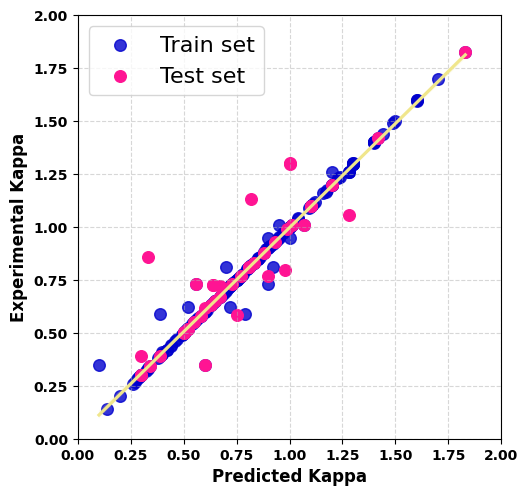

In [ ]:
# Plotting the graph
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming pred_xgbr_randombest is your predicted values for the test set
plt.figure(figsize=(5.5, 5.5))

# Plotting the grid
plt.grid(True, linestyle='--', alpha=0.5)

# Plotting the train set
sns.regplot(x=y_train, y=xg_pred_train, color='mediumblue', scatter_kws={'s': 70},
            line_kws={'color': 'khaki'}, label='Train set')

# Plotting the test set above the train set
plt.scatter(y_test, xg_pred_test, color='deeppink', s=70, label='Test set')

plt.xlabel('Predicted Kappa', fontsize=12, weight='bold')
plt.ylabel('Experimental Kappa', fontsize=12, weight='bold')
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.gca().set_aspect('equal', adjustable='box')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.legend(fontsize=16)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Define RMSE as a scoring function (squared=False ensures RMSE)
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False, squared=False)

# Define the KFold cross-validation strategy with a fixed random state
kf = KFold(n_splits=7, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(best_randomcv_xgb, X, y, cv=kf, scoring=rmse_scorer, n_jobs=-1, verbose=2)

# The scores are already negative due to greater_is_better=False, so we take the absolute values
cv_rmse_scores = np.abs(cv_scores)

# Display cross-validation results
print("Cross-validation RMSE scores:", np.round(cv_rmse_scores, 3))
print("Average CV RMSE:", np.mean(cv_rmse_scores))
print("Standard Deviation CV RMSE:", np.std(cv_rmse_scores))


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Cross-validation RMSE scores: [0.063 0.186 0.167 0.187 0.118 0.186 0.146]
Average CV RMSE: 0.15043190950017316
Standard Deviation CV RMSE: 0.042732504873354976


[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:   20.4s finished


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold

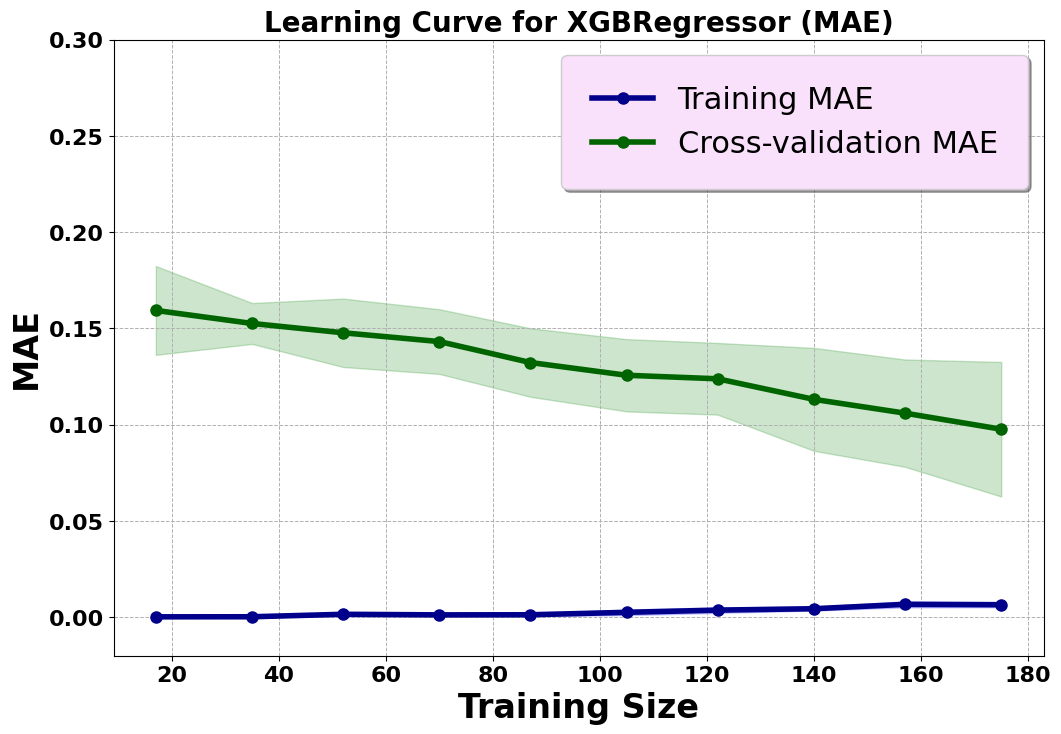

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, KFold
from sklearn.metrics import make_scorer, mean_absolute_error
import xgboost as xgb
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
xgbr = xgb.XGBRegressor(random_state=42)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
train_sizes, train_scores, test_scores = learning_curve(
    xgbr, X, y, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring=mae_scorer
)
train_scores_mean = -np.mean(train_scores, axis=1)  
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)  
test_scores_std = np.std(test_scores, axis=1)
plt.figure(figsize=(12, 8))
plt.plot(train_sizes, train_scores_mean, 'o-', color='darkblue', label='Training MAE', linewidth=4, markersize=8)
plt.plot(train_sizes, test_scores_mean, 'o-', color='darkgreen', label='Cross-validation MAE', linewidth=4, markersize=8)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color='blue')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color='green')

plt.title('Learning Curve for XGBRegressor (MAE)', fontsize=20, weight='bold')
plt.xlabel('Training Size', fontsize=24, weight='bold')
plt.ylabel('MAE', fontsize=24, weight='bold')
plt.ylim(-0.02, 0.3)
plt.xticks(fontsize=16, weight='bold')
plt.yticks(fontsize=16, weight='bold')
plt.grid(True, linestyle='--', linewidth=0.7)
legend = plt.legend(loc='upper right', fontsize=22, frameon=True, fancybox=True, framealpha=1, shadow=True, borderpad=1)
for line in legend.get_lines():
    line.set_linewidth(4.0)
legend.get_frame().set_facecolor('#f9e0fb')  # Light grey background
plt.show()


## Removing polycrystals

In [2]:
x_train = pd.read_excel('/content/x_train.xlsx')
x_test = pd.read_excel('/content/x_test.xlsx')
y_train = pd.read_excel('/content/y_train.xlsx')
y_test = pd.read_excel('/content/y_test.xlsx')

In [3]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import xgboost as xgb
xg_reg = xgb.XGBRegressor()
xg_reg.fit(x_train, y_train)
xg_pred_test = xg_reg.predict(x_test)
xg_pred_train = xg_reg.predict(x_train)
xg_rmse_test = sqrt(mean_squared_error(y_test, xg_pred_test))
xg_mae_test = mean_absolute_error(y_test, xg_pred_test)
xg_r2_test = r2_score(y_test, xg_pred_test)
xg_rmse_train = sqrt(mean_squared_error(y_train, xg_pred_train))
xg_mae_train = mean_absolute_error(y_train, xg_pred_train)
xg_r2_train = r2_score(y_train, xg_pred_train)
print("Min Test RMSE:", xg_rmse_test)
print("Min Test MAE:", xg_mae_test)
print("Max Test R2:", xg_r2_test)
print("Min Train RMSE:", xg_rmse_train)
print("Min Train MAE:", xg_mae_train)
print("Max Train R2:", xg_r2_train)

Min Test RMSE: 0.13604808438795662
Min Test MAE: 0.07203665007244459
Max Test R2: 0.8157849907875061
Min Train RMSE: 0.044063033046266645
Min Train MAE: 0.01273092813192014
Max Train R2: 0.9843811988830566


In [5]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
regressor = xgb.XGBRegressor()
booster = ['gbtree', 'gblinear']
base_score = [-0.75, -0.50, -0.25, 0, 0.10, 0.25, 0.5, 0.75, 1, 1.25, 1.35, 1.45, 1.50]
n_estimators = [100, 500, 900, 1100, 1500, 2000, 2200, 2300, 2400, 2500, 2600]
max_depth = [2, 3, 5, 10, 15, 20, 25]
learning_rate = [0.01, 0.05, 0.1, 0.15, 0.20]
min_child_weight = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
xgb_randomgrid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'learning_rate': learning_rate,
    'min_child_weight': min_child_weight,
    'booster': booster,
    'base_score': base_score
}
randomcv_xgbr = RandomizedSearchCV(estimator=regressor,
                                   param_distributions=xgb_randomgrid,
                                   n_iter=100,
                                   scoring='neg_mean_absolute_error',
                                   n_jobs=4, cv=5, verbose=5,
                                   return_train_score=True,
                                   random_state=13)
randomcv_xgbr.fit(x_train, y_train)
best_randomcv_xgb = randomcv_xgbr.best_estimator_
reg_xg = best_randomcv_xgb.fit(x_train, y_train)
pred_xgbr_randombest = best_randomcv_xgb.predict(x_test)
pred_xgbr_train = best_randomcv_xgb.predict(x_train)
xgbr_randombestTEST_rmse = np.sqrt(mean_squared_error(y_test, pred_xgbr_randombest))
xgbr_randombestTEST_mae = mean_absolute_error(y_test, pred_xgbr_randombest)
xg_r2_test = r2_score(y_test, pred_xgbr_randombest)
xgbr_randombestTRAIN_rmse = np.sqrt(mean_squared_error(y_train, pred_xgbr_train))
xgbr_randombestTRAIN_mae = mean_absolute_error(y_train, pred_xgbr_train)
xg_r2_train = r2_score(y_train, pred_xgbr_train)
print("Train RMSE:", xgbr_randombestTRAIN_rmse)
print("Train MAE:", xgbr_randombestTRAIN_mae)
print("Train R2:", xg_r2_train)
print("Test RMSE:", xgbr_randombestTEST_rmse)
print("Test MAE:", xgbr_randombestTEST_mae)
print("Test R2:", xg_r2_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Train RMSE: 0.04407851219116547
Train MAE: 0.012571327804805287
Train R2: 0.984370231628418
Test RMSE: 0.12871194595874824
Test MAE: 0.06523930942470378
Test R2: 0.8351162672042847


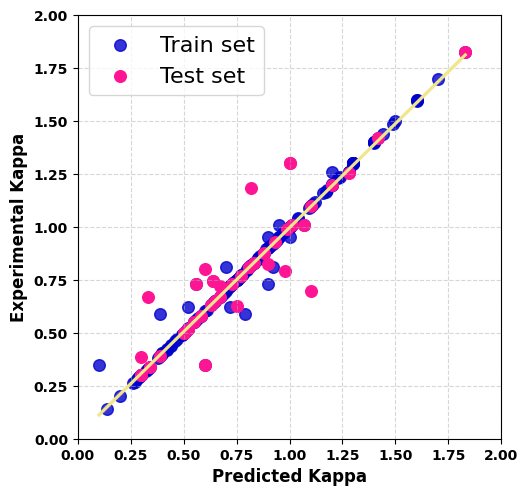

In [ ]:
# Plotting the graph
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming pred_xgbr_randombest is your predicted values for the test set
plt.figure(figsize=(5.5, 5.5))

# Plotting the grid
plt.grid(True, linestyle='--', alpha=0.5)

# Plotting the train set
sns.regplot(x=y_train, y=xg_pred_train, color='mediumblue', scatter_kws={'s': 70},
            line_kws={'color': 'khaki'}, label='Train set')

# Plotting the test set above the train set
plt.scatter(y_test, xg_pred_test, color='deeppink', s=70, label='Test set')

plt.xlabel('Predicted Kappa', fontsize=12, weight='bold')
plt.ylabel('Experimental Kappa', fontsize=12, weight='bold')
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.gca().set_aspect('equal', adjustable='box')
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.legend(fontsize=16)
plt.show()